### 8人工神经元
神经元的工作原理如下，本节将通过神经网络的方式将前面的线性回归再实现一次：
<img alt="神经元工作原理" height="800" src="3-12.png" width="1600"/>

In [9]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from time import perf_counter

In [10]:
#生成数据
x = torch.unsqueeze(torch.linspace(-3, 3, 10000), dim=1)
y = x + 1.2 * torch.rand(x.size())
print(x)
print(y)

tensor([[-3.0000],
        [-2.9994],
        [-2.9988],
        ...,
        [ 2.9988],
        [ 2.9994],
        [ 3.0000]])
tensor([[-2.2575],
        [-1.8890],
        [-2.6841],
        ...,
        [ 3.0098],
        [ 3.6803],
        [ 4.1029]])


In [11]:
#创建线性回归类
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()  #继承父类初始化函数
        self.linear = nn.Linear(1, 1)  #1纬输入和输出

    def forward(self, x):  #这里的out相当于上一节的out=imputs.mm(w)
        out = self.linear(x)
        return out

In [12]:
#初始化实例和输入输出
CUDA = torch.cuda.is_available()
if CUDA:
    LR_model = LR().cuda()
    inputs = x.cuda()
    target = y.cuda()
else:
    LR_model = LR()
    inputs = x
    target = y

In [13]:
criterion = nn.MSELoss()  #设置损失函数
optimizer = optim.SGD(LR_model.parameters(), lr=1e-4)

In [14]:
def draw(output, loss):
    if CUDA:
        output = output.cpu()
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'loss=%s' % (loss.item()), fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)

In [15]:
def train(model, criterion, optimizer, epochs):
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 80 == 0:
            draw(output, loss)

    return model, loss

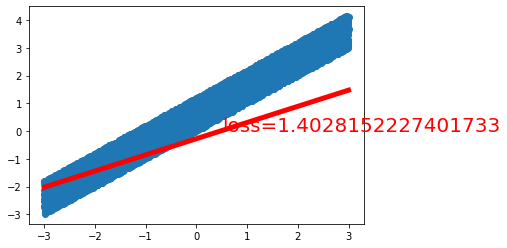

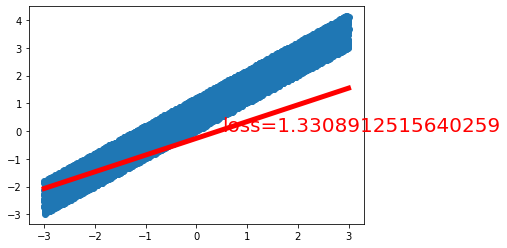

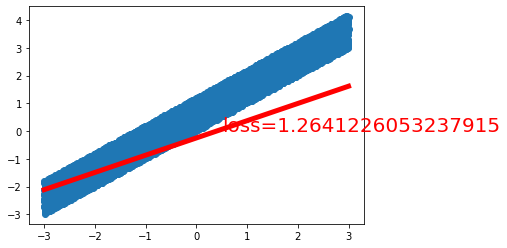

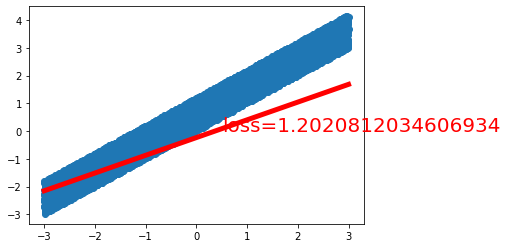

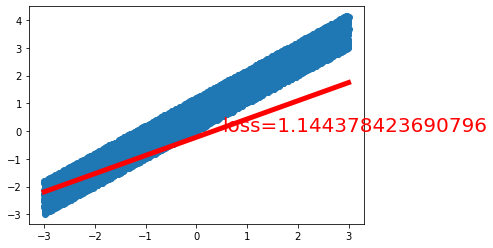

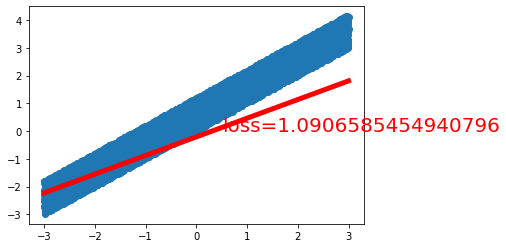

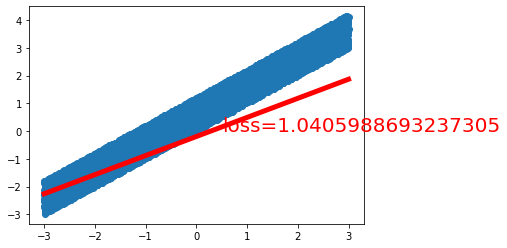

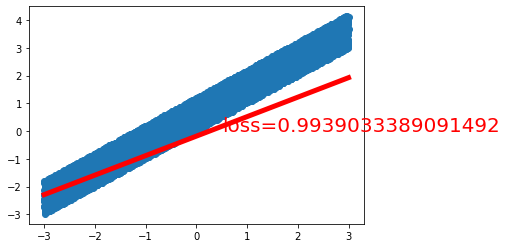

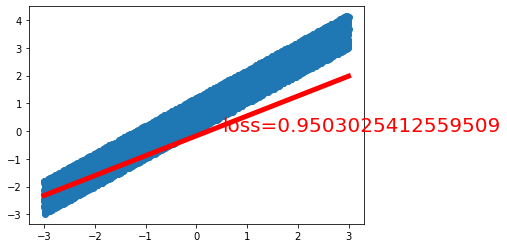

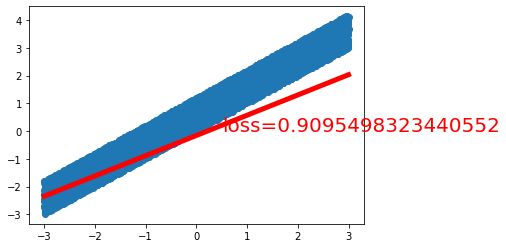

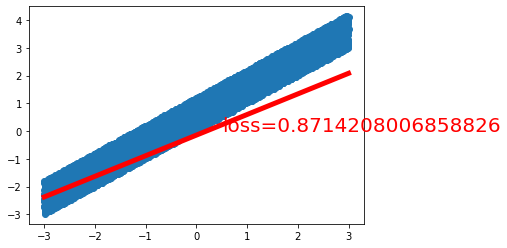

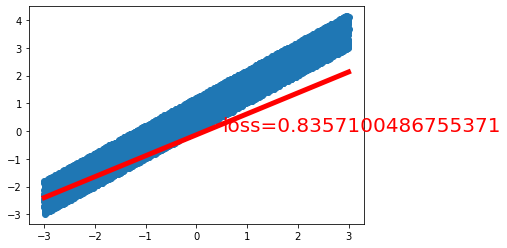

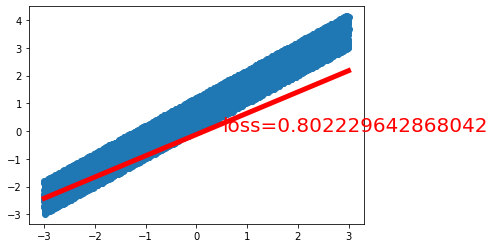

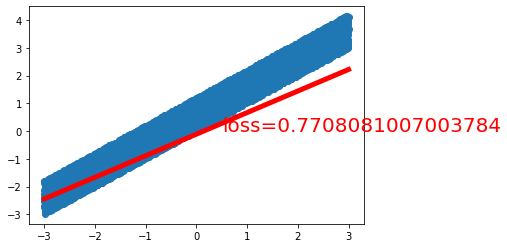

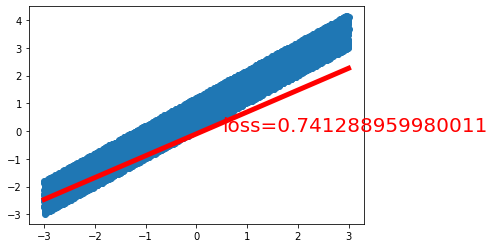

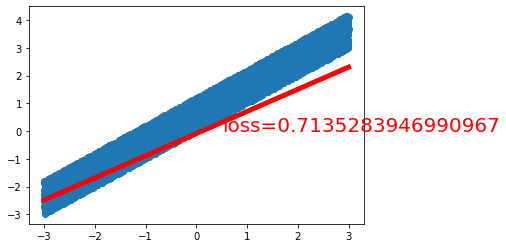

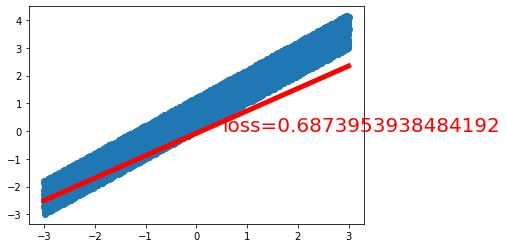

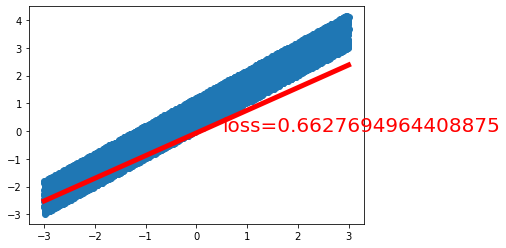

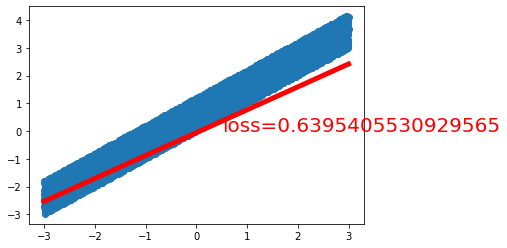

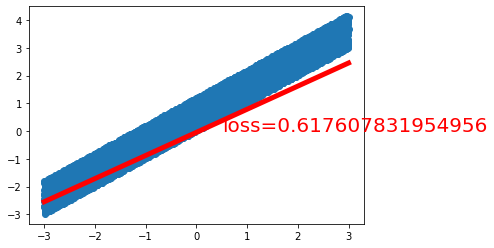

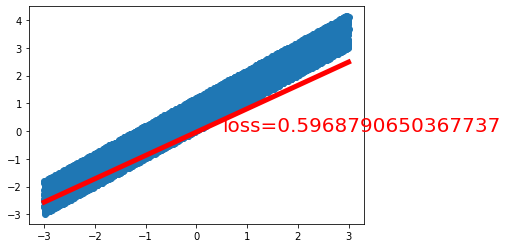

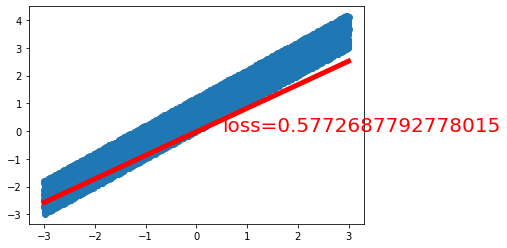

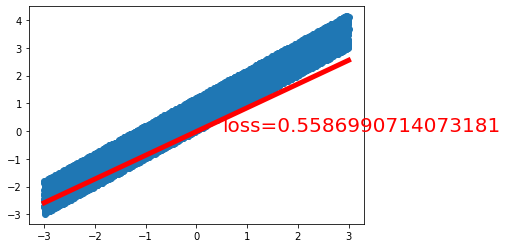

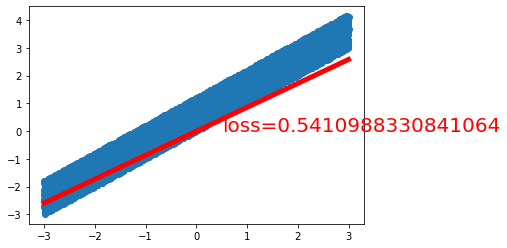

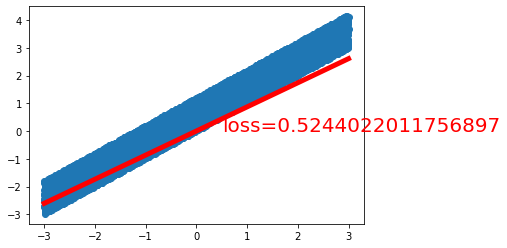

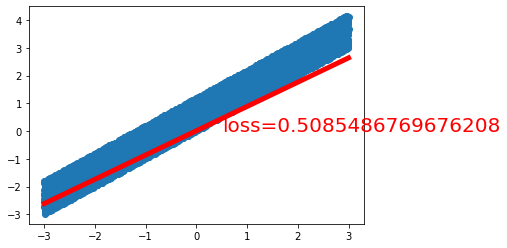

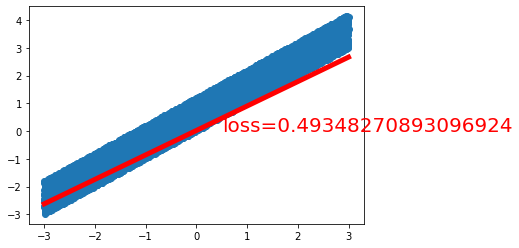

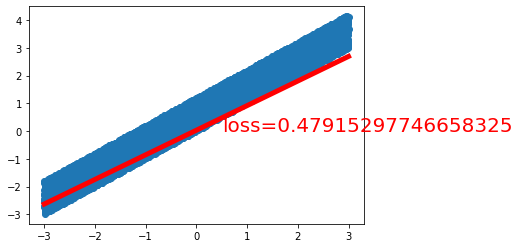

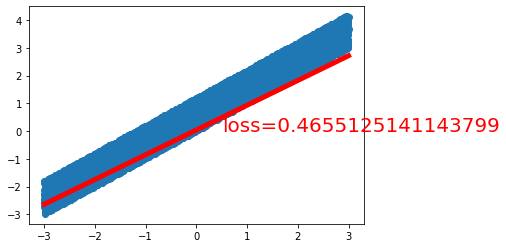

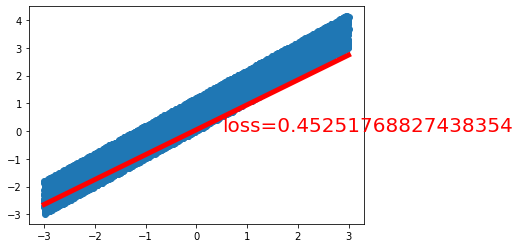

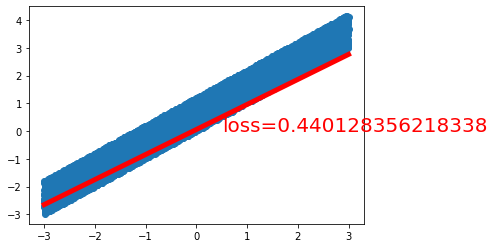

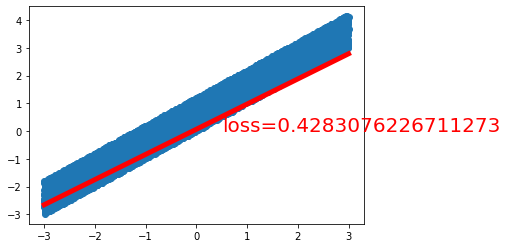

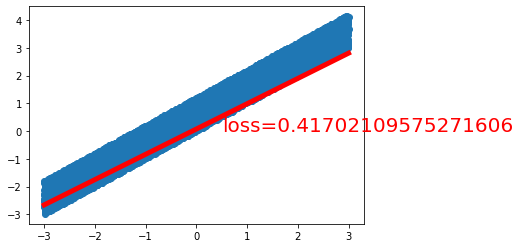

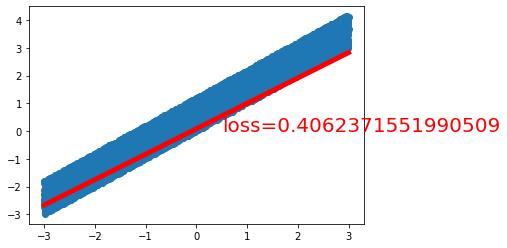

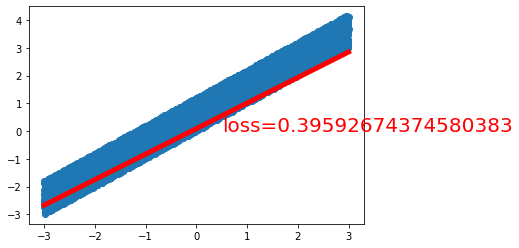

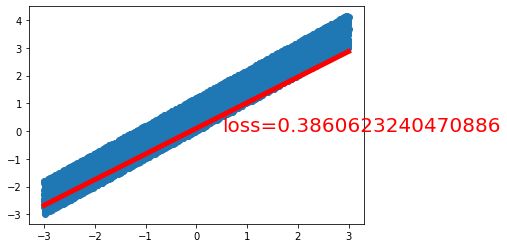

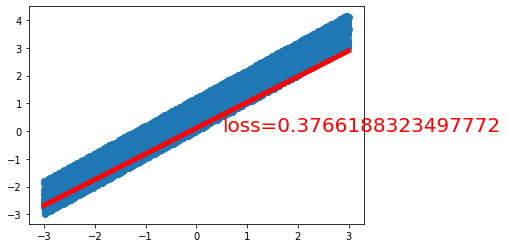

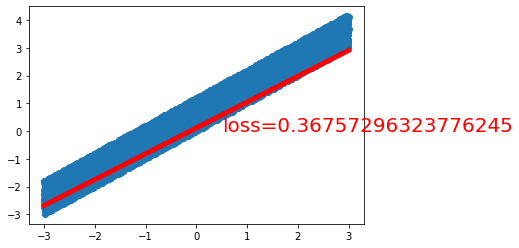

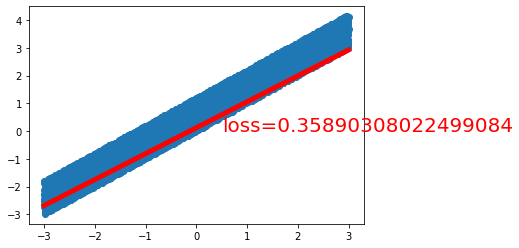

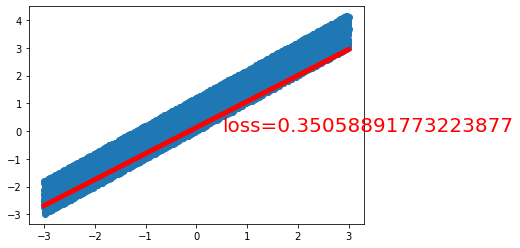

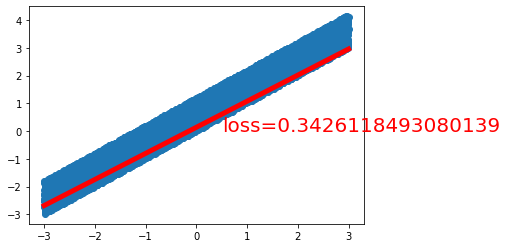

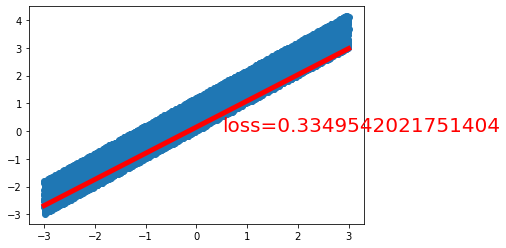

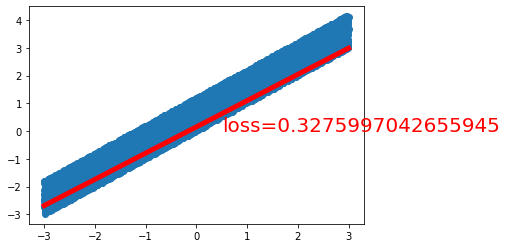

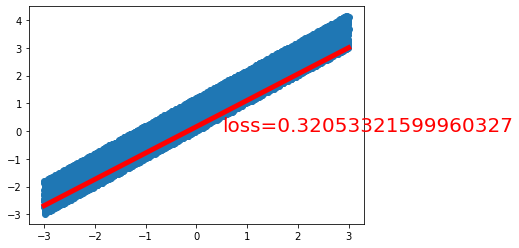

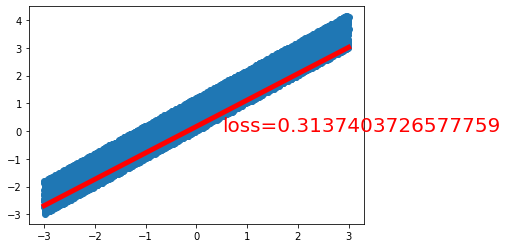

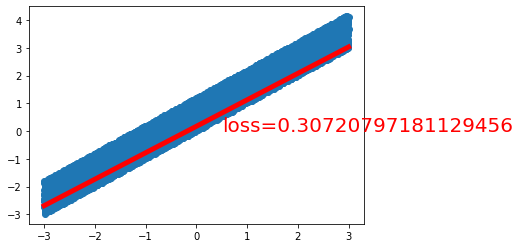

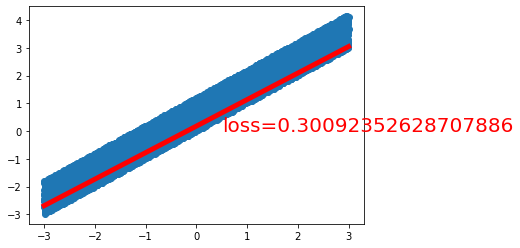

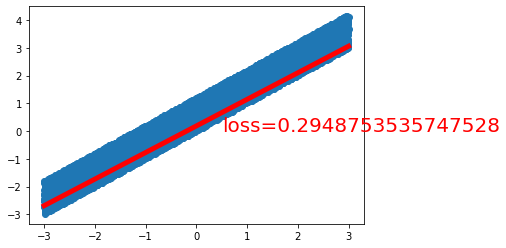

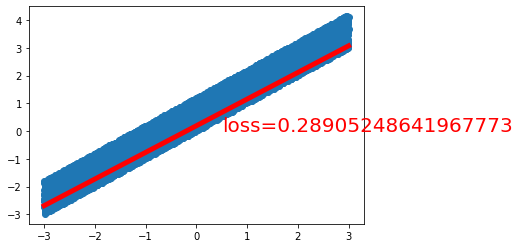

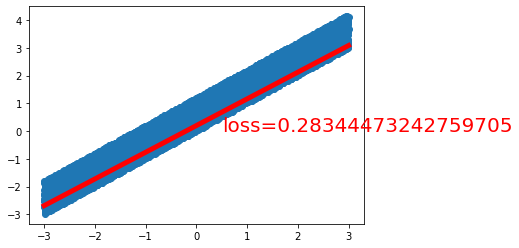

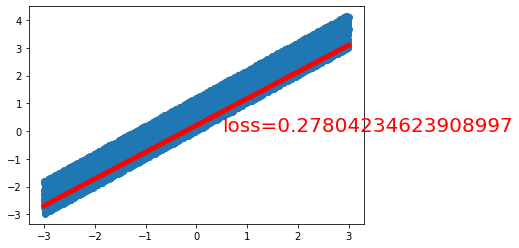

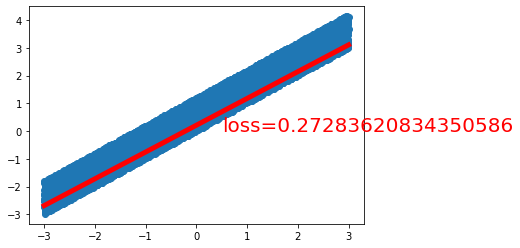

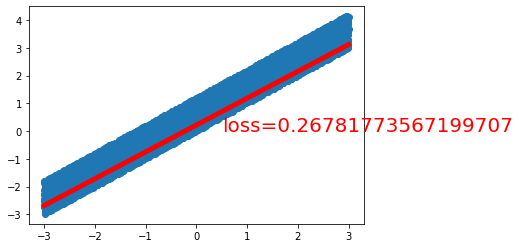

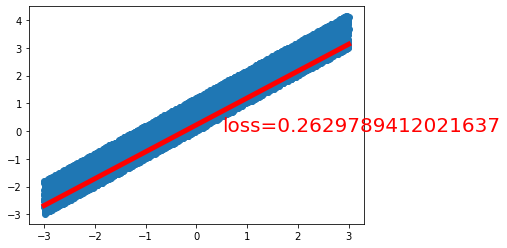

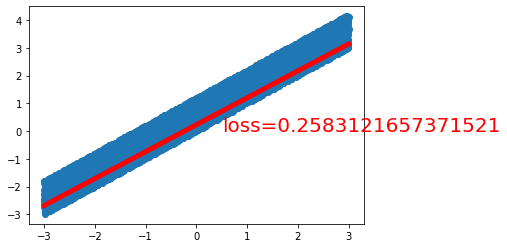

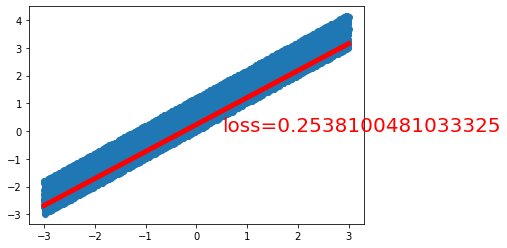

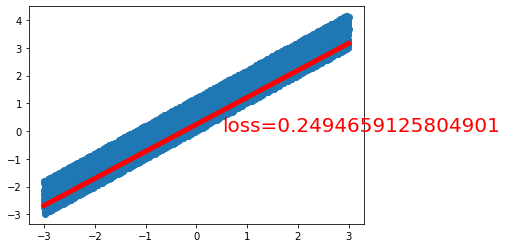

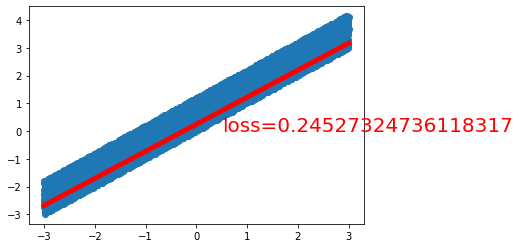

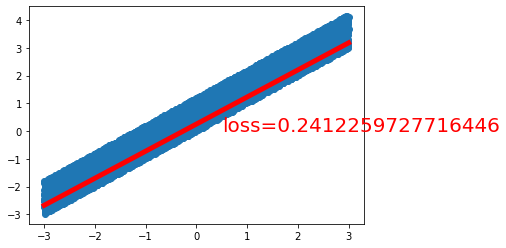

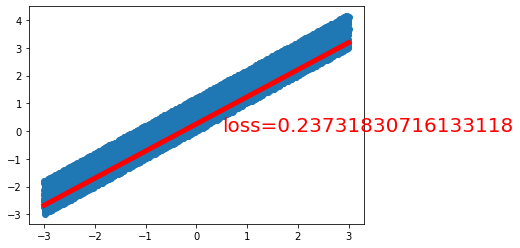

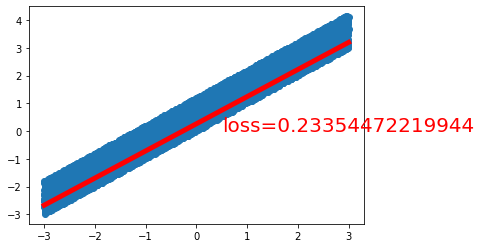

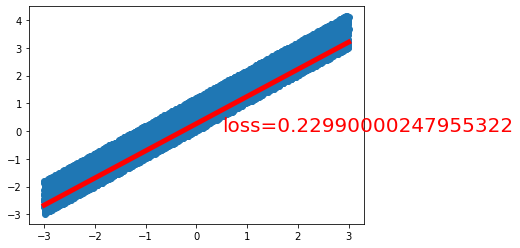

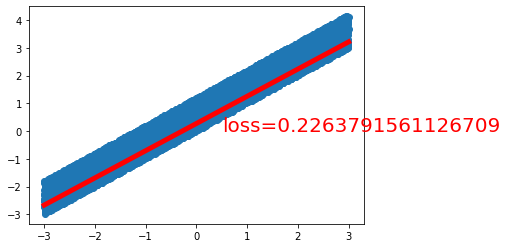

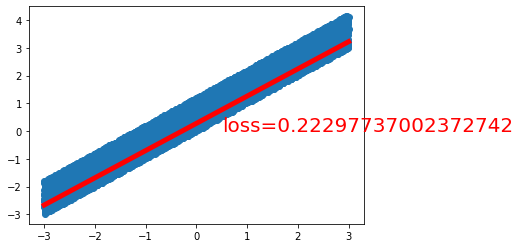

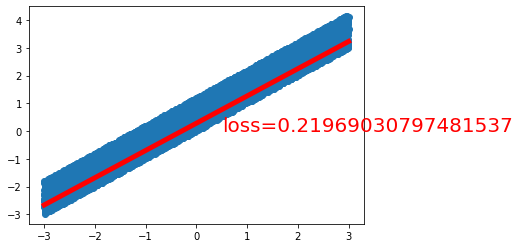

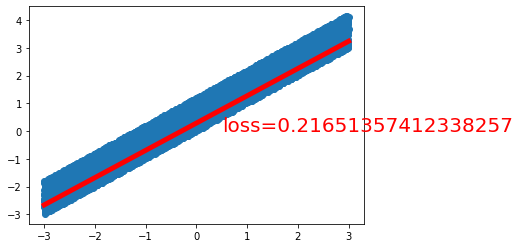

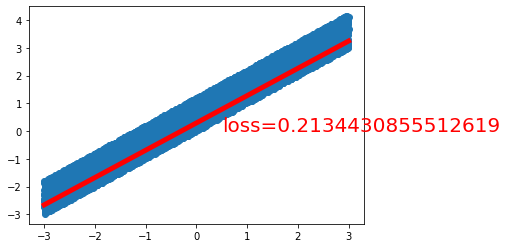

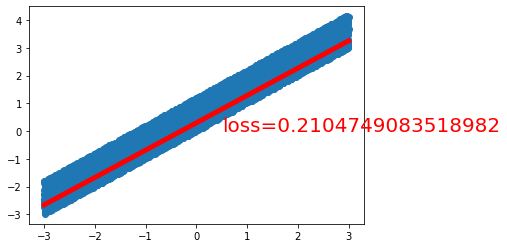

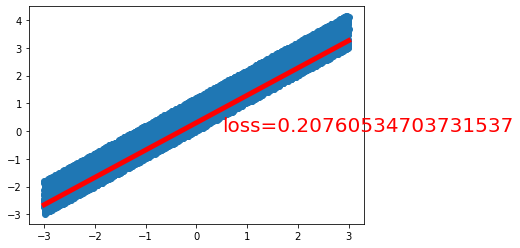

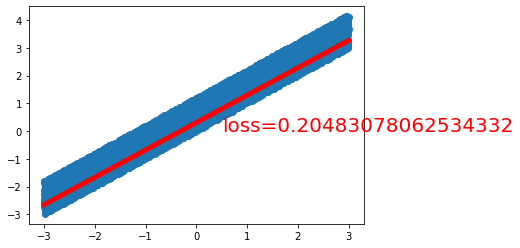

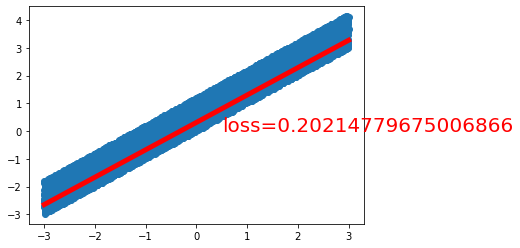

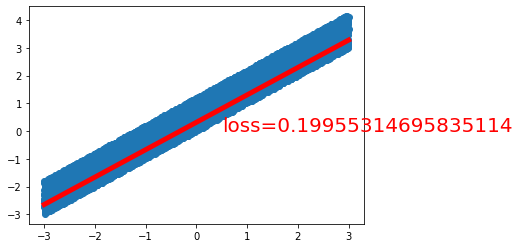

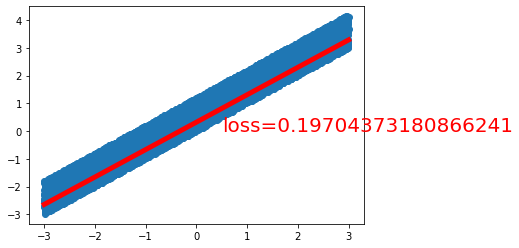

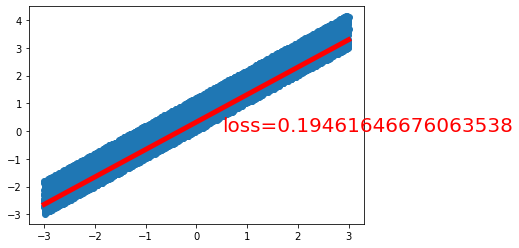

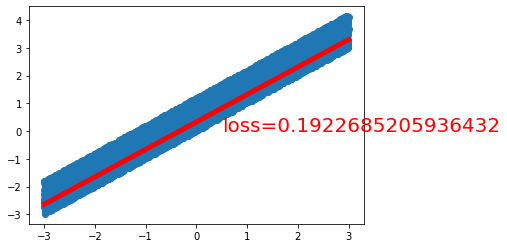

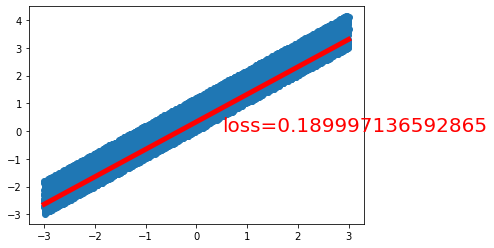

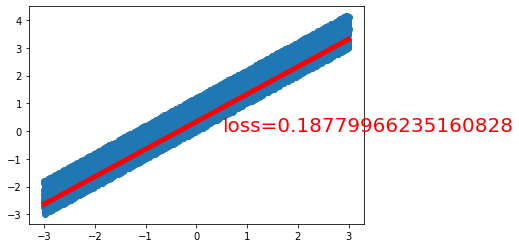

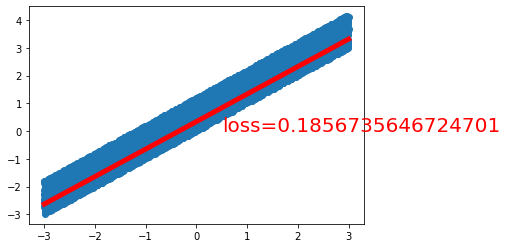

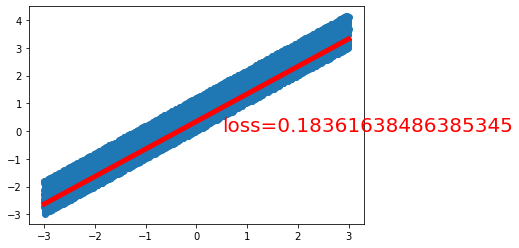

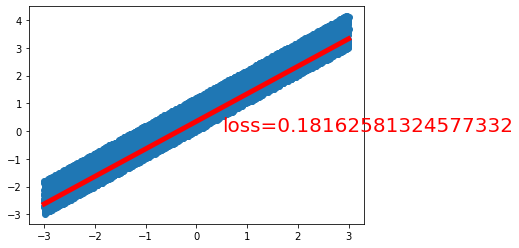

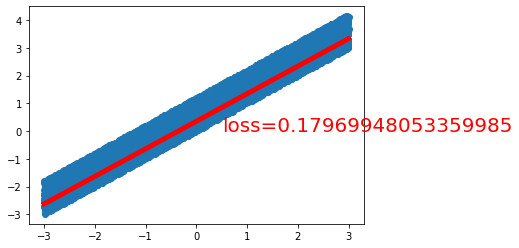

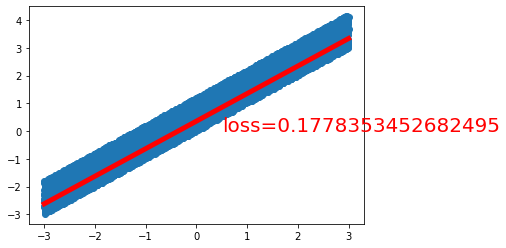

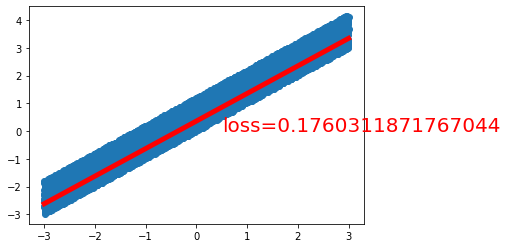

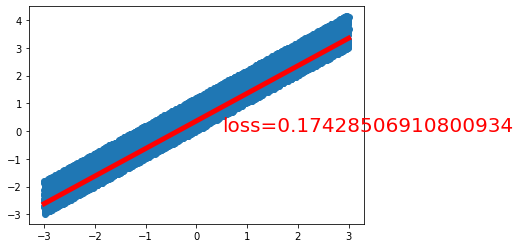

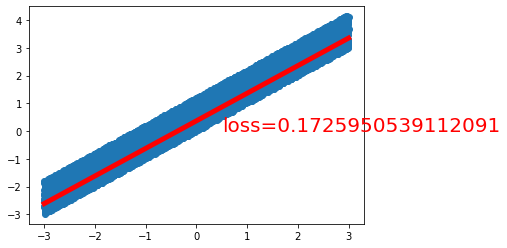

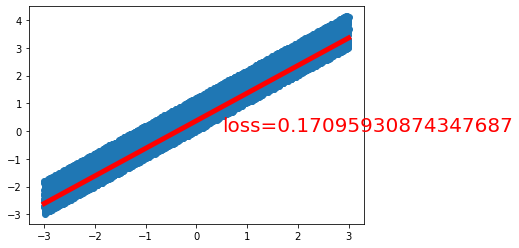

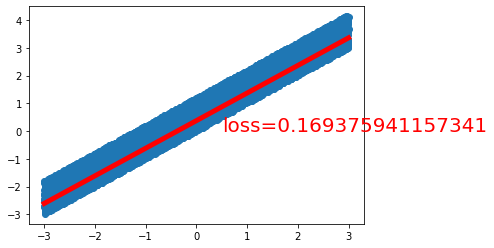

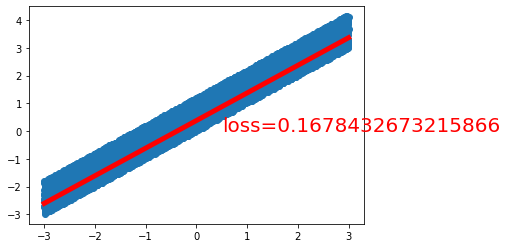

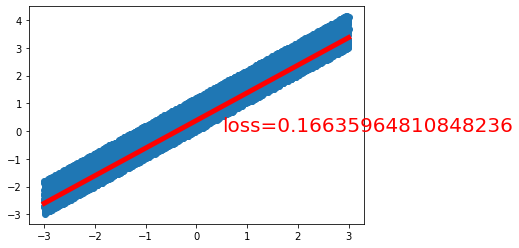

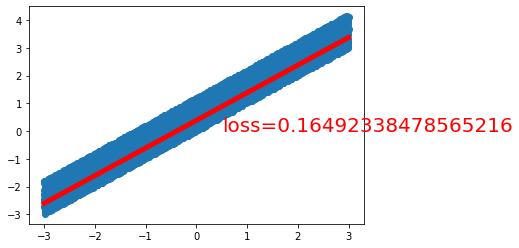

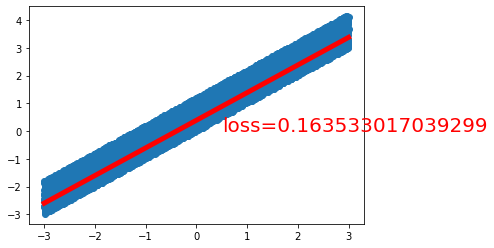

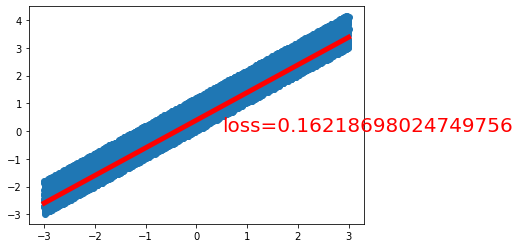

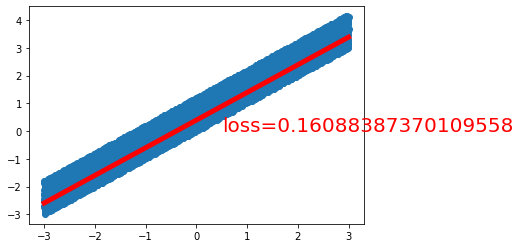

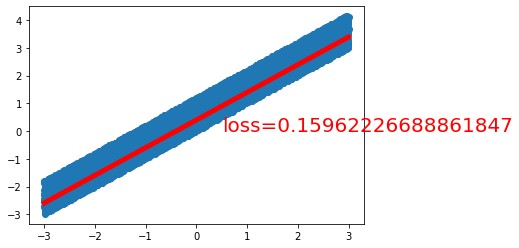

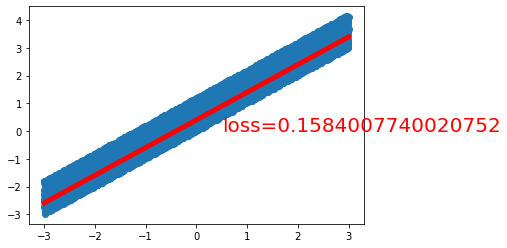

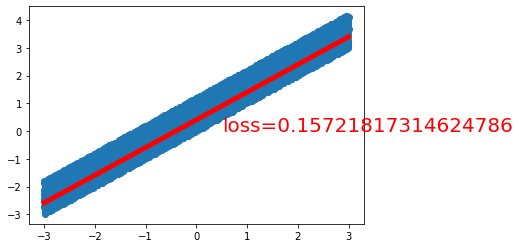

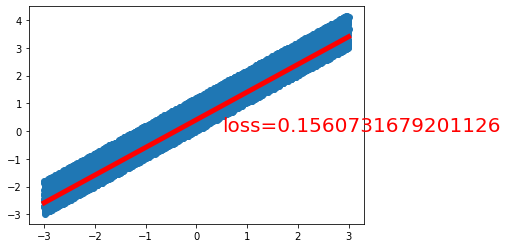

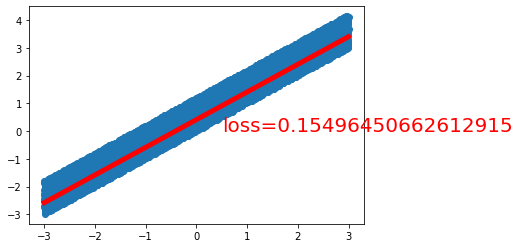

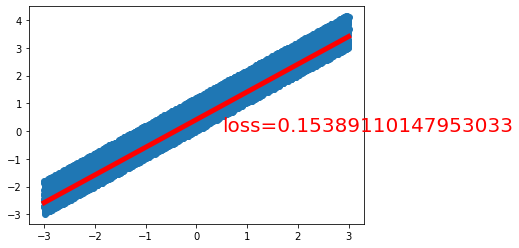

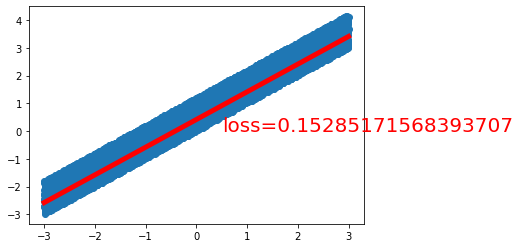

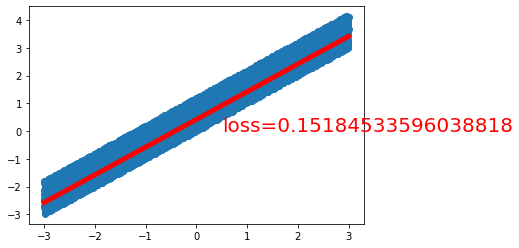

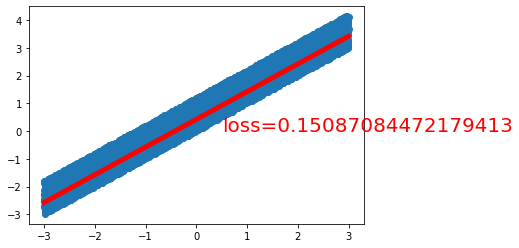

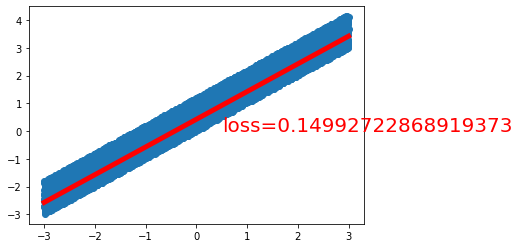

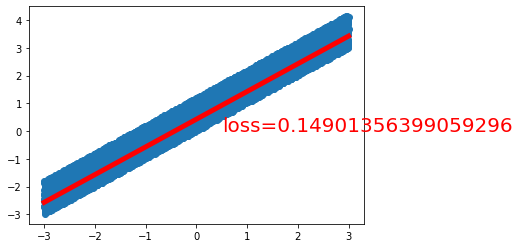

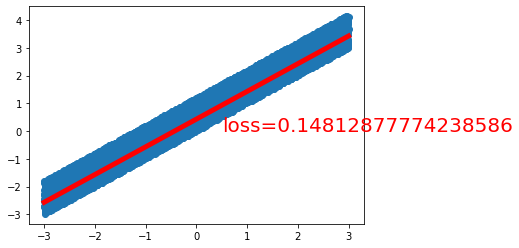

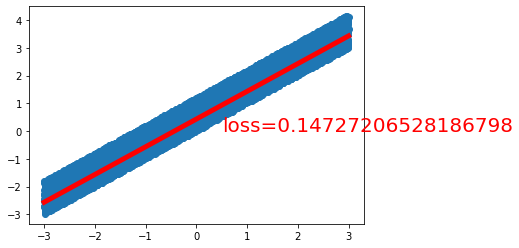

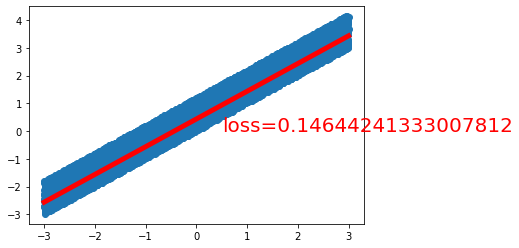

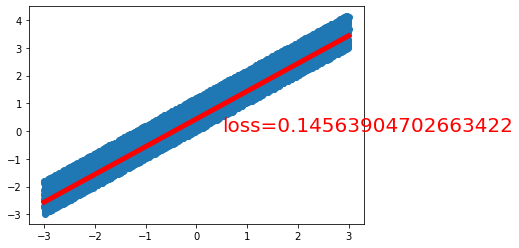

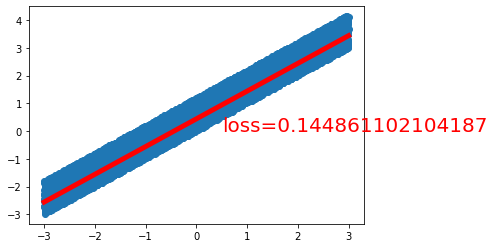

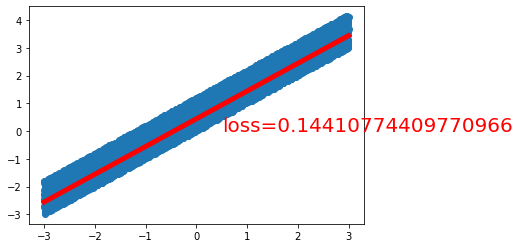

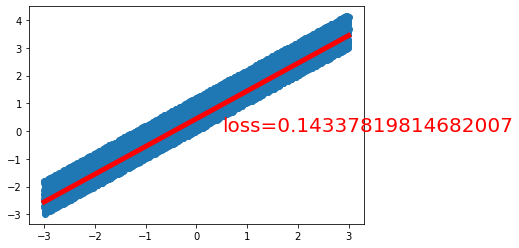

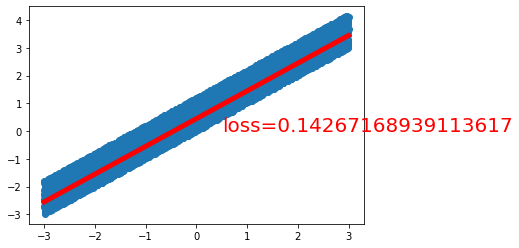

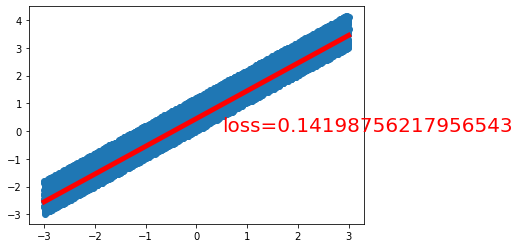

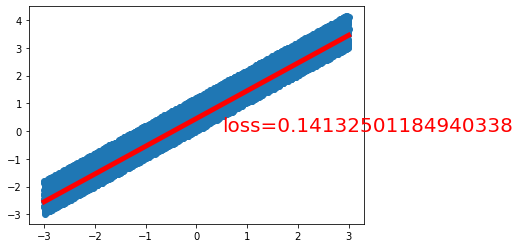

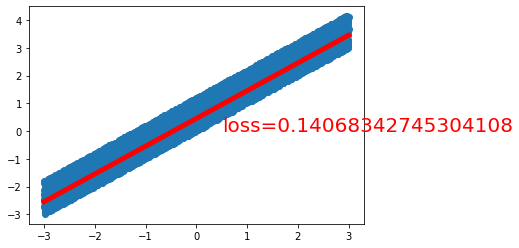

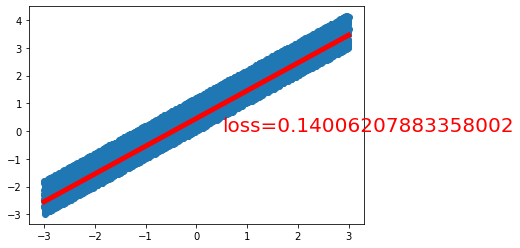

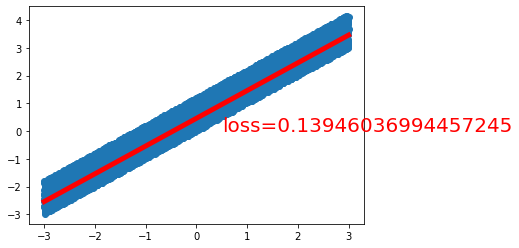

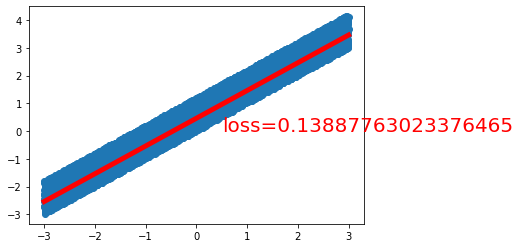

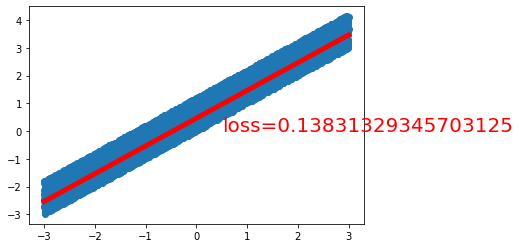

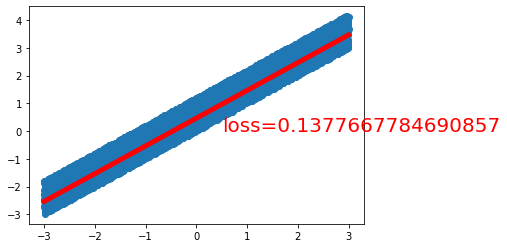

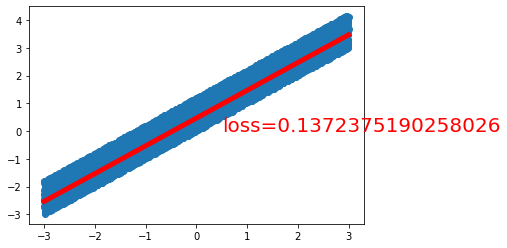

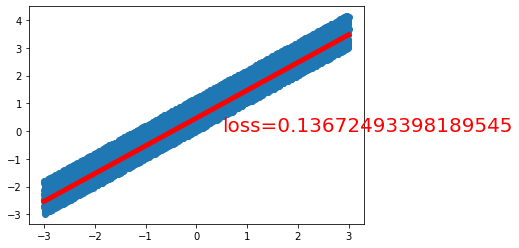

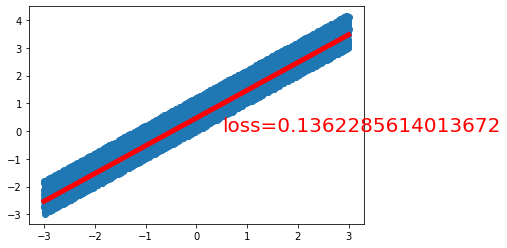

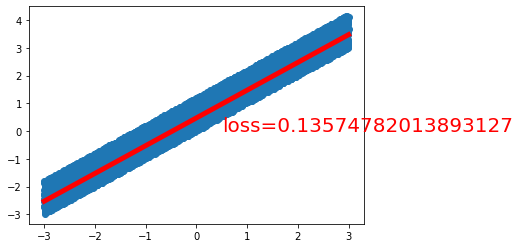

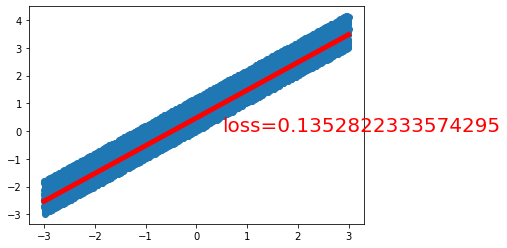

In [16]:
start = perf_counter()
LR_model, loss = train(LR_model, criterion, optimizer, 10000)
finish = perf_counter()
time = finish - start

In [17]:
print("计算时间:%s" % time)
print("final loss:", loss.item())
print("weights:", list(LR_model.parameters()))

计算时间:31.27192588700001
final loss: 0.13483691215515137
weights: [Parameter containing:
tensor([[1.0006]], requires_grad=True), Parameter containing:
tensor([0.4775], requires_grad=True)]
